# Problem 11.9

***Fundamentals of Solar Cells and Photovoltaic Systems Engineering***

**Solutions Manual - Chapter 11**

***Problem 11.9***


**In this problem, we will use the Python package PVMismatch to investigate the power losses due to the surface curvature (1/1000 mm-1 in the horizontal direction) and different shadow profiles in a VIPV system. To that end, the electrical response of curved PV modules must be simulated for different irradiance patterns over the module. For comparison, we will also model the I-V curve of a flat PV module uniformly illuminated with an area equal to the projected area of curved modules.**

**The curved PV module consists of 15 series-connected solar cells arranged in 5 columns, with 1 bypass diode in every column (every 3 cells) as shown in Figure 11.16.a). Three different irradiance patterns are considered as presented in 11.Figure 16.b), in which the shadowed solar cells (in dark color) have a relative irradiance of 10% compared to cells totally illuminated (in yellow).**


**FIGURE A**

![image_a](../../../Figures/Chapter_11/Figure11.16_Problem11.09_a.jpg)

**FIGURE B**

![image_b](../../../Figures/Chapter_11/Figure11.16_Problem11.09_b1.jpg)

**Follow the next steps:**

**(a) Start by defining in PVMismatch the module considering the interconnection topology of Figure 11.16 a.**

**(b) Assuming square solar cells of 156 x 156 mm, calculate the irradiance on every cell (normalized to the irradiance on the center of the PV module) for the curved PV module of 1000 mm of radius of curvature in the horizontal direction (cylindrical shape). Assume that the vector pointing to the Sun is perpendicular to the normal to the PV module at this center.**

**(c) Calculate the irradiance on every cell (normalized to the irradiance on the center of the PV module) in the curved PV module considering the three different irradiance patterns of Figure 11.16 b). Shadowed solar cells (in dark color) have a relative irradiance of 10% compared to cells without shadow.**

**(d) Plot the IV curves of the flat PV module uniformly illuminated, the curved PV module without shadows, and the curved PV modules with the three different evaluated irradiance patterns.**


We will use the packages [PVMismatch](https://sunpower.github.io/PVMismatch/) and [matplotlib.pyplot](https://matplotlib.org/stable/index.html) to plot the results.


In [6]:
import math
from copy import deepcopy
import pvmismatch as pvmm
import matplotlib.pyplot as plt

We start by defining in `PVMismatch` a PV module with series-connected solar cells distributed in 3 rows and 5 columns.

In [7]:
cell_pos = pvmm.pvmodule.standard_cellpos_pat(nrows=3, ncols_per_substr=5*[1])
pvmod_flat = pvmm.PVmodule(cell_pos=cell_pos)

print(cell_pos)

[[[{'crosstie': False, 'idx': 0}, {'crosstie': False, 'idx': 1}, {'crosstie': False, 'idx': 2}]], [[{'crosstie': False, 'idx': 5}, {'crosstie': False, 'idx': 4}, {'crosstie': False, 'idx': 3}]], [[{'crosstie': False, 'idx': 6}, {'crosstie': False, 'idx': 7}, {'crosstie': False, 'idx': 8}]], [[{'crosstie': False, 'idx': 11}, {'crosstie': False, 'idx': 10}, {'crosstie': False, 'idx': 9}]], [[{'crosstie': False, 'idx': 12}, {'crosstie': False, 'idx': 13}, {'crosstie': False, 'idx': 14}]]]


The `cell_pos` object can be interpreted graphically like this image.

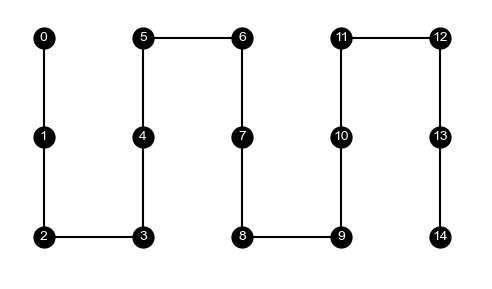

An additional PV module is defined with the same configuration but considering that it is curved.

First, the irradiance perpendicular to every cell (normalized to the irradiance perpendicular to the normal of the PV module in the center) is calculated. 

In [8]:
pvmod_curve = pvmm.PVmodule(cell_pos=cell_pos)

def get_aoi_projection(side, radius):
    aoi = side / (2 * math.pi * radius) * 360
    aoi_projection = math.cos(math.radians(aoi))
    return aoi_projection

cell_side = 156 # mm
mod_radius = 1000 # mm
mid_col = 2.5 # position of the column in the middle of the module

for row_pos, row in enumerate([[0, 5, 6, 11, 12], [1, 4, 7, 10, 13], [2, 3, 8, 9, 14]]):
    for col_pos, cell_idx in enumerate(row):
        aoi_proj = get_aoi_projection(side=(col_pos + 0.5 - mid_col) * cell_side, radius=mod_radius)
        pvmod_curve.setSuns(aoi_proj, cells=[cell_idx])

print(pvmod_curve.Ee)

[[0.95172155]
 [0.95172155]
 [0.95172155]
 [0.98785666]
 [0.98785666]
 [0.98785666]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.98785666]
 [0.98785666]
 [0.98785666]
 [0.95172155]
 [0.95172155]
 [0.95172155]]


Three other irradiance patterns are obtained by copying the 'unshadowed' curved PV module irradiance distribution and specifying the increasing levels of shading.

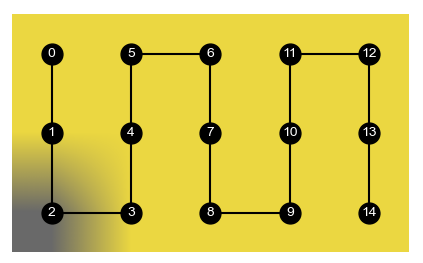
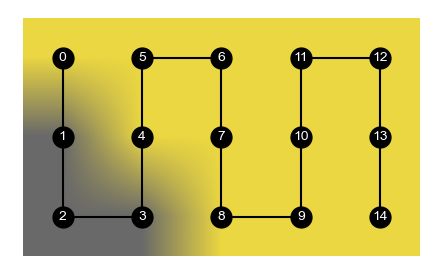
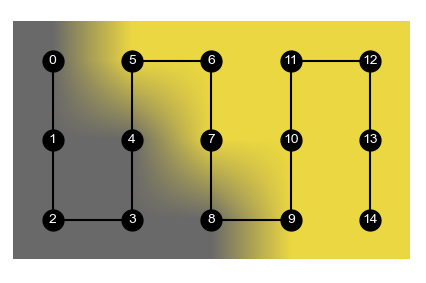

In [9]:
pvmod_curve_shade1 = deepcopy(pvmod_curve)
pvmod_curve_shade1.setSuns(0.1, cells=[2])

pvmod_curve_shade2 = deepcopy(pvmod_curve)
pvmod_curve_shade2.setSuns(0.1, cells=[2, 1, 3])

pvmod_curve_shade3 = deepcopy(pvmod_curve)
pvmod_curve_shade3.setSuns(0.1, cells=[2, 1, 3, 0, 4, 8])

print(pvmod_curve_shade3.Ee)

[[0.1       ]
 [0.1       ]
 [0.1       ]
 [0.1       ]
 [0.1       ]
 [0.98785666]
 [1.        ]
 [1.        ]
 [0.1       ]
 [0.98785666]
 [0.98785666]
 [0.98785666]
 [0.95172155]
 [0.95172155]
 [0.95172155]]


We can now calculate the IV curves of the different modules and plot them. 

Pmp of flat = 50.2 W
Pmp of curved = 48.7 W
Pmp of curved shade1 = 36.3 W
Pmp of curved shade2 = 23.4 W
Pmp of curved shade3 = 10.7 W


Text(0.5, 0, 'Voltage (V)')

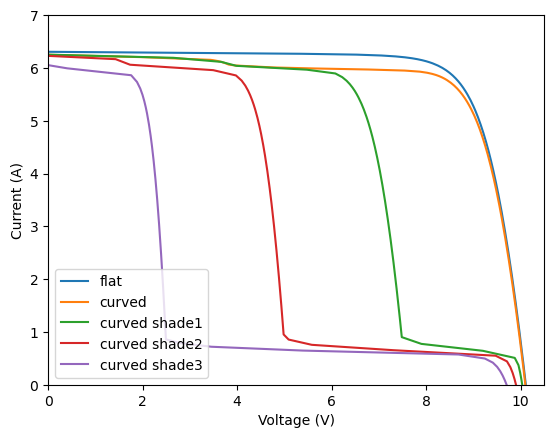

In [10]:
fig, ax = plt.subplots()

list_mods = [pvmod_flat, pvmod_curve, pvmod_curve_shade1, pvmod_curve_shade2, pvmod_curve_shade3]
list_names_mods = ['flat', 'curved', 'curved shade1', 'curved shade2', 'curved shade3']

for mod, name_mod in zip(list_mods, list_names_mods):
    ax.plot(mod.Vmod, mod.Imod)
    pmp = pvmm.PVsystem(pvmods=mod, numberStrs=1, numberMods=1).Pmp
    print(f'Pmp of {name_mod} = {pmp:.1f} W')

ax.set_xlim(0, pvmod_curve.numberCells * 0.7)
ax.set_ylim(0, 7)
ax.legend(list_names_mods, loc='lower left')
ax.set_ylabel('Current (A)')
ax.set_xlabel('Voltage (V)')